In [1]:
from numba import *
import math
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def timeit(f, iteration=1000):
    time_list = []
    for i in range(iteration):
        tic = time.time()
        f()
        time_list.append((time.time() - tic) * 1000)
    return time_list

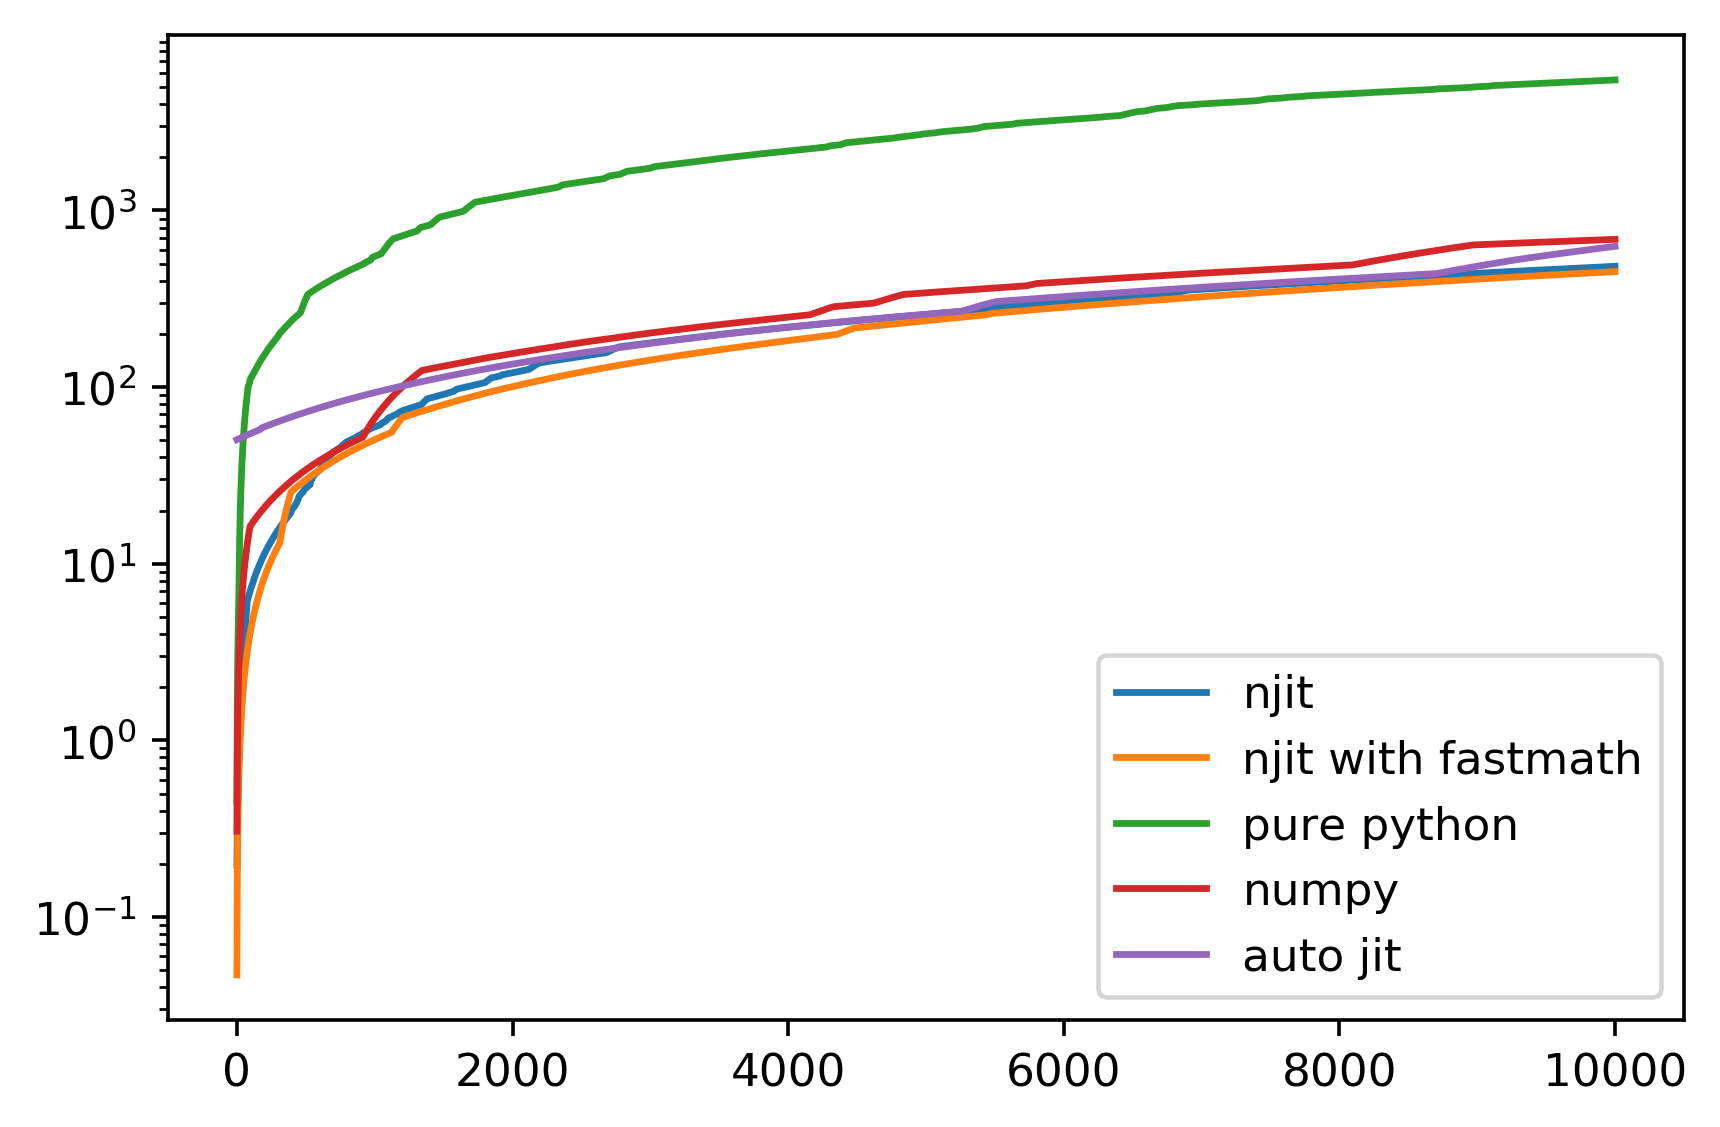

In [3]:
# euclidean distance
def dis(a, b):
    _ = 0
    for _a, _b in zip(a, b):
        _ += (_a - _b) ** 2
    return math.sqrt(_)

@njit(float64(float64[:], float64[:]), cache=False, fastmath=False)
def dis_njit(a, b):
    _ = 0
    for _a, _b in zip(a, b):
        _ += (_a - _b) ** 2
    return math.sqrt(_)

@njit(float64(float64[:], float64[:]), cache=False, fastmath=True)
def dis_njit_fastmath(a, b):
    _ = 0
    for _a, _b in zip(a, b):
        _ += (_a - _b) ** 2
    return math.sqrt(_)

def dis_numpy(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

@jit
def dis_auto_jit(a, b):
    _ = 0
    for _a, _b in zip(a, b):
        _ += (_a - _b) ** 2
    return math.sqrt(_)


max_iter = 10000
njit_time_list = timeit(lambda: dis_njit(np.random.randn(1000), np.random.randn(1000)), max_iter)
njit_fastmath_time_list = timeit(lambda: dis_njit_fastmath(np.random.randn(1000), np.random.randn(1000)), max_iter)
time_list = timeit(lambda: dis(np.random.randn(1000), np.random.randn(1000)), max_iter)
numpy_time_list = timeit(lambda: dis_numpy(np.random.randn(1000), np.random.randn(1000)), max_iter)
auto_jit_time_list = timeit(lambda: dis_auto_jit(np.random.randn(1000), np.random.randn(1000)), max_iter)

fig = plt.figure(dpi=326)
plt.plot(np.arange(max_iter), np.cumsum(njit_time_list), label="njit")
plt.plot(np.arange(max_iter), np.cumsum(njit_fastmath_time_list), label="njit with fastmath")
plt.plot(np.arange(max_iter), np.cumsum(time_list), label="pure python")
plt.plot(np.arange(max_iter), np.cumsum(numpy_time_list), label="numpy")
plt.plot(np.arange(max_iter), np.cumsum(auto_jit_time_list), label="auto jit")
plt.legend()
plt.yscale("log")
plt.show()
plt.close()